In [49]:
import scipy as sc
import math as m
import matplotlib as mp
from matplotlib import pyplot as pl
import datetime as d
import numpy as np
from numpy import random as r
import os
import string
#import ok

In [50]:
run_start = d.datetime.utcnow(); #Use this if this notebook initiates the data collection, 
                                 #this line records the start time
run_start=run_start.strftime('%m_%d_%Y_%H_%M_%S_%f'); #Format of timestamp is month_day_year_minute_second_microsecond
filename= 'chronopixel_hits_%s.npz' %run_start; #Files will be named chronopixel_hits_<run_start>.npz
#run_start = 'ex' Use if you wish to manually input the run start

chronopixel_hits_06_12_2018_12_04_53_536624.npz


In [51]:
thres_volt='10 mV'; #This section will be used to input different pieces of metadata
comment='Fill with any comments';
temp='ex';
freq='50MHz';                    #Should be changed if a different clock speed is used
metadata=np.chararray((6,2), unicode=True, itemsize=60); #This creates a numpy character array to store the metadata
metadata[0][0]='filename'; #The rest of this cell is just filling the array with the metadata
metadata[0][1]=File; #The first column will be the type of data stored
metadata[1][0]="Date & Time"; #The second column will be the actual values
metadata[1][1]=run_start;
metadata[2][0]="Threshold Voltage";
metadata[2][1]=thres_volt;
metadata[3][0]="Temperature";
metadata[3][1]=temp;
metadata[4][0]="Clock Frequency";
metadata[4][1]=freq;
metadata[5][0]="Run Comments";
metadata[5][1]=comment;
print(metadata);

[['filename' 'chronopixel_hits_06_12_2018_12_04_53_536624.npz']
 ['Date & Time' '06_12_2018_12_04_53_536624']
 ['Threshold Voltage' '10 mV']
 ['Temperature' 'ex']
 ['Clock Frequency' '50MHz']
 ['Run Comments' 'Fill with any comments']]


In [52]:
#These next two cells are prototypes for reading in the data
data=r.randint(2, size=(12285,400)); #This creates a random binary array representing the data
runs=int(len(data[:,0])/4095); #This determines the number of chronopixel readouts that the data file contains
test_data= np.empty([4095, 400, runs]); #Creates an empty array 3D array to store the data
for n in range(runs): #This section stores the data in the 3D array. The x-axis is the timestamp number, 
    #the y-axis is the pixel number and the z-axis is the readout number
    for m in range((n*4095),((n+1)*4095)):
        for i in range(400):
            test_data[(m-(n*4095))][i][n]=data[m][i];

In [53]:
#Original prototype
#test_data = np.empty([4095,400,runs]); 
#test_data = r.randint(2, size=(4095,400,runs))
#run_store = np.savez('chronopixel_run_%s' %run_start, test_data); 
#time=[n for n in range(4095)];
#print('chronopixel_run_%s' %run_start);

In [66]:
time=np.empty([runs,4095]); #Creates an empty array for the timestamp relative to the start of the run
for n in range(runs):
    for m in range(4095):
        time[n][m]=(n*4095)+m #This creates a timestamp for each readout relative to the beginning of the run
hits=np.empty([runs,len(test_data[:,0,0])]); #This array will store the total number of hits at each point in time
for n in range(runs): #x-axis is the run number and y-axis is the timestamp
    for m in range(len(test_data[:,0,0])):
        hits[n][m]=sum(test_data[m,:,n]); #This sums the hits over all the pixels at time m
path=u'/Users/walterwilson/Chronopixel_Data_Analysis/%s'%filename; #This is the directory the files will be stored in
#Currently I am storing the files to the location of my Python notebooks
file= np.savez_compressed(filename, data=hits, time=time, meta=metadata); #Creating a compressed file with the data,
#timestamp and the metadata which is saved to the previously mentioned directory
opened_hits = np.load(filename);

4095


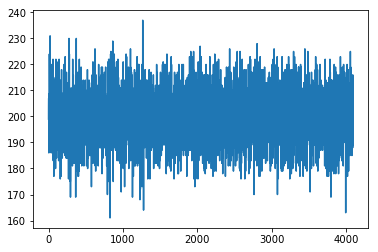

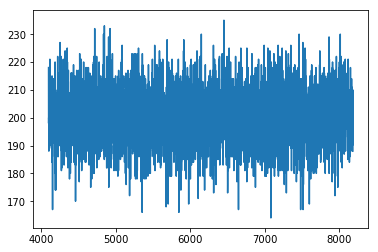

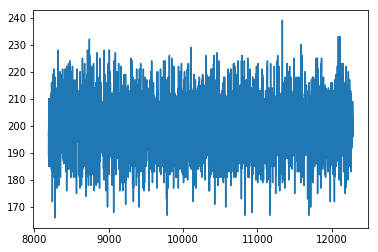

In [67]:
for n in range(runs): #Plotting the number of recorded hits at each timestamp for each of the readouts
    pl.plot(time[n,:],hits[n,:]);
    pl.show();

In [61]:
avr_hits=np.empty(len(hits[:,0])) #Finding the average number of detected hits for each readout
for n in range(len(hits[:,0])):
    avr_hits[n]=sum(hits[n,:])/len(hits[n,:])
print(avr_hits);

[ 199.78754579  200.12527473  200.12234432]
